In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
observe_dev = 10

# 状態空間
def true_value(pre_x = 0, time = 0):
    x = pre_x+np.sin(time)
    y = x
    return x, y 

# ノイズあり結果
def noise_value(pre_x = 0, time = 0, state_deviation = 1, observe_deviation = observe_dev):
    x = pre_x + np.sin(time) + np.random.normal(0, state_deviation)
    y = x + np.random.normal(0, observe_deviation)
    return x, y

def kf(model_parameter=0, observed_parameter=0, pre_variance=0, observe_deviation = observe_dev):
    variance = pre_variance + 1 / 2
    K = variance / (variance + observe_deviation**2)
    true_value = (1-K)*model_parameter + K * observed_parameter
    variance = (1-K) * variance
    return true_value, variance, K

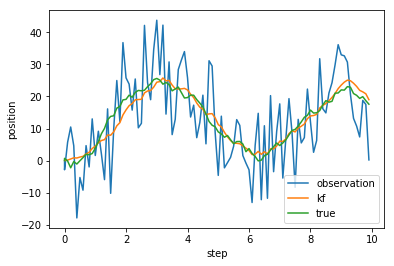

In [3]:
time = 0
x = np.zeros(1)


y_noise = np.zeros(1)
y_kf = np.zeros(1)
y_true_noise = np.zeros(1)

y_temp = 0
noise_temp = 0
pre_variance = 0
b = 0

for i in range(100):
    time = i/10
    x=np.append(x,time)
    b, y_temp = noise_value(pre_x = b, time = time)
    a, noise_temp = true_value(pre_x = y_kf[i], time = time)
    y_true_noise = np.append(y_true_noise, b)
    y_noise=np.append(y_noise, y_temp)
    y_temp, pre_variance, K = kf(model_parameter = noise_temp, 
                                 observed_parameter = y_noise[i+1],
                                 pre_variance = pre_variance)
    y_kf=np.append(y_kf, y_temp)

plt.plot(x,y_noise, label = 'observation')
plt.plot(x,y_kf, label = 'kf')
plt.plot(x,y_true_noise, label = 'true')
plt.legend(loc = 'best')
plt.xlabel('step')
plt.ylabel('position')
plt.savefig('kf.png')